<a href="https://colab.research.google.com/github/arsalanrzp/Pattern-Recognition/blob/main/SOM_on_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <font color='green'> <div align="center">In the name of God </div></font>
### <font color='black'>**SOM on MNIST dataset by Amir Arsalan Rezapour**</font>
<font color='red'> Credit: Sayed Kamaledin Ghiasi-Shrirazi</font>

<a href="http://profsite.um.ac.ir/~k.ghiasi">http://profsite.um.ac.ir/~k.ghiasi</a>

### Self-Organizing Maps

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.io as sio

In [12]:
from keras.datasets import mnist
#loading the dataset
(MnistTrainX, MnistTrainY), (MnistTestX, MnistTestY) = mnist.load_data()
MnistTrainX = MnistTrainX.reshape(-1, 28*28)
MnistTestX = MnistTestX.reshape(-1, 28*28)

In [4]:
%matplotlib inline
mpl.rcParams['figure.dpi']= 600

In [14]:
def som(X, gridLength, h, maxIteration, minPercentChange):
    K = gridLength ** 2
    print(X.shape)
    (N, dim) = X.shape
    # Initialize centers
    c = np.random.rand(K, dim) * 0.1
    J_old = np.inf
    means = np.zeros ([K,dim])
    count = np.zeros (K)
    for t in range(maxIteration):
        dist = np.zeros([N, K])
        for j in range(K):
            cj = np.array(c[j, :], ndmin=2)
            cj_repeated = np.repeat(cj, N, axis=0)
            d = X - cj_repeated
            d **= 2
            d = np.sum(d, axis=1)
            dist[:, j] = d
        S = np.argmin(dist, axis=1)
        J = 0
        for i in range(K):
            for j in range(K):
                idx = (S == j)
                J += h(i,j) * np.sum(dist[idx, i])
        J = np.sum (dist[range(N),S])
        print ('SOM objective function:   ', J)
        if (J_old - J < minPercentChange * J_old):
            break
        J_old = J
        if t != maxIteration - 1:
            for j in range(K):
                index = (S == j)
                Xj = X[index, :]
                count[j] =  Xj.shape[0]
                if (count[j] > 0):
                    means[j,:] = np.mean(Xj, axis=0)
                else:
                    means[j,:] = 0

            for i in range(K):
                num = np.zeros(dim)
                denum = 0
                for j in range(K):
                    num += h(i,j) * count[j] * means[j,:]
                    denum += h(i,j) * count[j]
                if (denum != 0):
                    c[i, :] = num / denum
    return (c, S)

In [15]:
idx = MnistTrainY.squeeze() != 100
XTrain = MnistTrainX[idx,:]

In [16]:
gridLength = 10
def h(i,j):
    xi = i // gridLength
    yi = i % gridLength
    xj = j // gridLength
    yj = j % gridLength
    d2 = (xi - xj) ** 2 + (yi - yj) ** 2
    nbhd = np.exp (-0.5 * d2)
    return nbhd

In [9]:
XTrain.shape

(60000, 28, 28)

In [17]:
maxIteration = 100
minPercentChange = 0.001
(c,S) = som(XTrain, gridLength, h, maxIteration, minPercentChange)

(60000, 784)
SOM objective function:    342413548203.30634
SOM objective function:    170352327910.5396
SOM objective function:    146967406234.0495
SOM objective function:    139857041133.0963
SOM objective function:    137463038573.40875
SOM objective function:    135996067865.09454
SOM objective function:    135279733734.53358
SOM objective function:    134969391644.69379
SOM objective function:    134803422272.30641
SOM objective function:    134627654539.64465
SOM objective function:    134408960369.51817
SOM objective function:    134249081322.86249
SOM objective function:    134136628192.23828


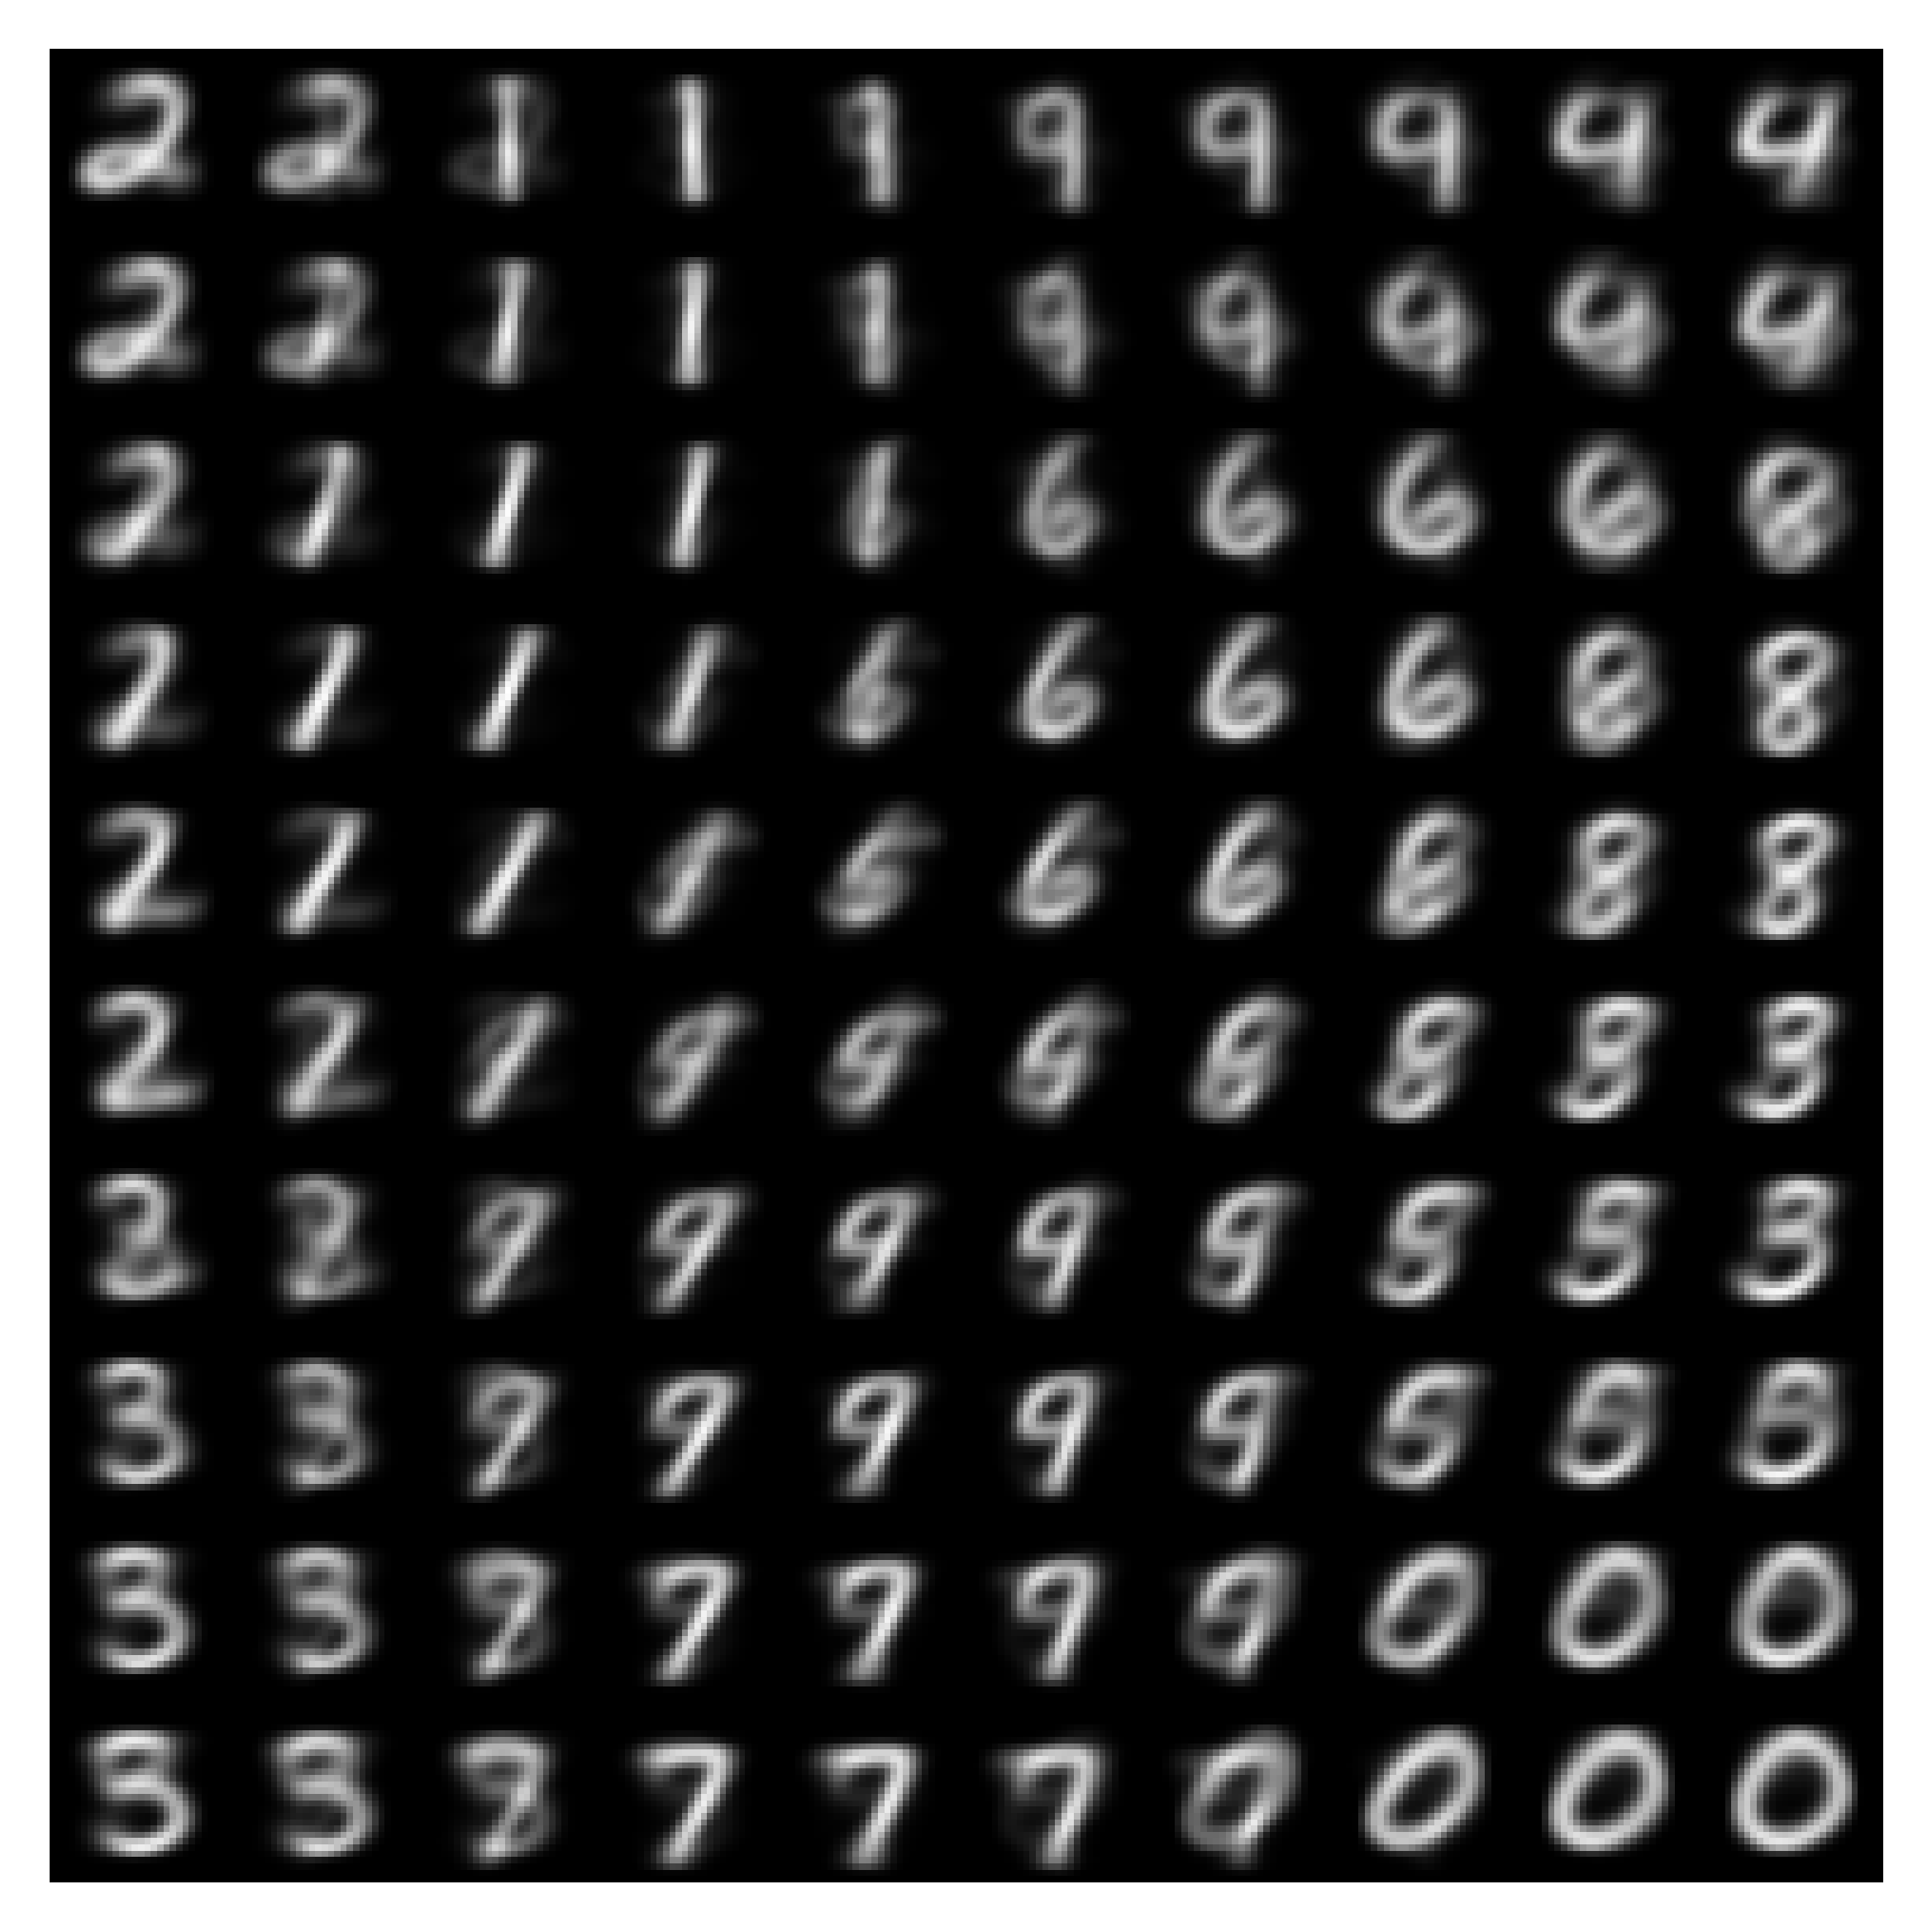

In [18]:
K = gridLength** 2
L = int(np.sqrt(K-1)+1)
img = np.zeros([L*29,L*29])
for i in range (L):
    for j in range (L):
        k = i * L + j
        if (k < K):
            img[i*29:i*29+28, j*29:j*29+28] = np.reshape(c[k,:], [28,28])

imh = plt.imshow (img, cmap='gray');
plt.axis('off')
plt.show()

In [ ]:
plt.imsave ('som.png', img, cmap='gray');